# CorNN scheme run demo

* [1. Insetion algorithm (fingerprint embedding)](#insertion)
    * [Step 1](#i-step-1) - an example of mark=0
    * [Step 2](#i-step-2) - an example of mark=1
    * [Step 3](#i-step-3) - an example of marking an attribute with missing values
    * ...
* [2. Detection algorithm](#detection)
    * [Step 1](#d-step-1)
    * [Step 2](#d-step-2)
    * [Step 3](#d-step-3)
    * [Step 50 to end](#d-step-50)

In [1]:
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image

In [2]:
from NCorrFP_scheme.NCorrFP_scheme import NCorrFP

In [3]:
# original data
data = "datasets/breast_cancer_full.csv"
dataset = pd.read_csv(data)
correlated_attributes = ['age', 'menopause', 'inv-nodes', 'node-caps']

# fingerprinting 
scheme = NCorrFP(gamma=1, fingerprint_bit_length=16, k=10)
fingerprinted_data, iter_log = scheme.demo_insertion('breast-cancer', primary_key='Id', secret_key=601, recipient_id=4,
                                          correlated_attributes=correlated_attributes)

Start the demo NCorr fingerprint insertion algorithm...
	gamma: 1
	correlated attributes: ['age', 'menopause', 'inv-nodes', 'node-caps']

Generated fingerprint for recipient 4: 1110000100111100

Generated fingerprint for recipient 4: 1110000100111100
Inserting the fingerprint...

Training balltrees in: 0.01 sec.
Fingerprint inserted.
Runtime: 0 ms.


## 1. Insertion algorithm (embedding) <a class="anchor" id="insertion"></a>
The insertion algorithm takes as input:
- dataset
- owner's secret key, recipient ID
- fingerprint length, marking ratio gamma
- list of correlated attributes
- whether the neighbourhood search is distance based (_d_ -- max distance) or cardinality based (_k_ -- minimum cardinality of the neighbourhood)

### Step 1: <a class="anchor" id="i-step-1"></a>
The marking position  (row, attribute) are chosen pseudorandomly seeded by the owner's secret key
#### Marking position: 
- Marking row: 0
- Marking attribute: "_deg-malig_"
- Original value: 3

In [4]:
# iter_log[0]['row_index'] # --> 0
# iter_log[0]['attribute'] # --> deg-malig
dataset.iloc[[0]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events


#### Neighbourhood: 
We need to mark (i.e. modify) the value of "deg-malig", so we are looking for values likely to occur in the dataset. We take into account the correlated attributes (age, menopause, inv-nodes and node-caps) and find the neighbour hood based on their values in this record. 

We set the algorithm to cardinality-based with k=10 -- this means that in each step the neighbourhood is at least of size 10. In cases where more than k records share the same distance from the record in question, we increase the size of the neighbourhood to include all these additional records.

For instance, in this case, 22 records have distance==0.0 (i.e. exact same values of correlated attributes as the observed record), therefore we account for all these 22 records.

In [5]:
print('Neighbours idx: ' + str(iter_log[0]['neighbors']))
print('Neighbours dist: ' + str(iter_log[0]['dist']))

Neighbours idx: [0, 22, 77, 74, 148, 138, 118, 35, 116, 107, 51, 99, 90, 171, 205, 219, 221, 193, 238, 281, 268, 252]
Neighbours dist: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


To summ up:
- Correlated attributes: _age, menopause, inv-nodes, node-caps_
- Neighbourhood size: 21
- Max distance (hamming): 0

In [6]:
dataset.iloc[iter_log[0]['neighbors']]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
22,22,30-39,premeno,25-29,0-2,no,2,right,left_low,no,no-recurrence-events
77,77,30-39,premeno,25-29,0-2,no,1,left,central,no,no-recurrence-events
74,74,30-39,premeno,5-9,0-2,no,2,left,right_low,no,no-recurrence-events
148,148,30-39,premeno,20-24,0-2,no,3,left,central,no,no-recurrence-events
138,138,30-39,premeno,40-44,0-2,no,2,left,left_low,yes,no-recurrence-events
118,118,30-39,premeno,10-14,0-2,no,1,right,left_low,no,no-recurrence-events
35,35,30-39,premeno,30-34,0-2,no,2,left,left_up,no,no-recurrence-events
116,116,30-39,premeno,15-19,0-2,no,1,left,left_low,no,no-recurrence-events
107,107,30-39,premeno,40-44,0-2,no,2,right,right_up,no,no-recurrence-events


- Frequencies of the marking attribute 'deg-malig' in the neighbourhood: 

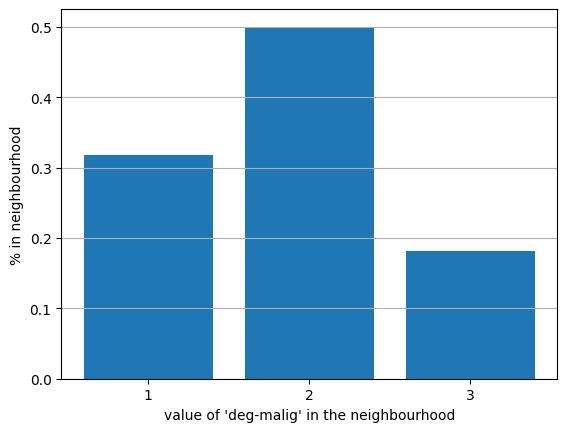

In [7]:
plt.bar(list(iter_log[0]['frequencies'].keys()), list(iter_log[0]['frequencies'].values()), align='center')
plt.xticks(list(iter_log[0]['frequencies'].keys()))
plt.ylabel('% in neighbourhood')
plt.xlabel('value of \'deg-malig\' in the neighbourhood')
plt.grid(axis='y')

We observe now the values of our marking attribute 'deg-malig' in the neighbourhood. 

#### Marking:

The goal is to modify its value to something that is _likely_ to occur. To introduce pseudorandomness, we obtain _mark bit_ from PRNG based on which there are two outcomes:
- _mark bit is 1_ (50%) -- the value shall be marked to the most frequent one from the neighbourhood
- _mark bit is 0_ (50%) -- the value shall be one of the remaining values in the neighbourhood, chosen randomly weighted by their frequencies

In this particular case, the probabilities of marking 'deg-malig' to values [1, 2, 3] are [32% ,50%, 18%] in that order.

The actual outcome of this step: 
- Mark bit: 0 --> the new value is chosen as a weighted random draw from 2nd to last most represented value in the neighbourhood
- New (fingerprinted) value: '_deg-malig_': 1 

In [8]:
fingerprinted_data.head(1)

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,1,left,left_low,no,no-recurrence-events


### Step 2: <a class="anchor" id="i-step-2"></a>
#### Marking position: 
- Marking row 0, attribute "_age_"

In [9]:
dataset.iloc[[1]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events


#### Neighbourhood: 
- Correlated attributes: _(age), menopause, inv-nodes, node-caps_
- Neighbourhood size: 103
- Max distance (hamming): 0

In case when one of the correlated attributes is chosen for marking, in this case 'age', we are not including it in the neighbourhood search, otherwise we would have likely had one value for "age" in the neighbourhood as the minimum distance is often 0.

In [10]:
dataset.iloc[iter_log[1]['neighbors']]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
65,65,40-49,premeno,10-14,0-2,no,1,right,left_up,no,no-recurrence-events
64,64,40-49,premeno,25-29,0-2,no,1,left,right_low,no,no-recurrence-events
77,77,30-39,premeno,25-29,0-2,no,1,left,central,no,no-recurrence-events
78,78,50-59,premeno,25-29,0-2,no,2,left,left_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...,...
256,256,40-49,premeno,30-34,0-2,no,1,left,left_low,yes,recurrence-events
281,281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
269,269,40-49,premeno,25-29,0-2,no,2,left,left_low,yes,recurrence-events
268,268,30-39,premeno,35-39,0-2,no,3,left,left_low,no,recurrence-events


The neighbourhood search results in 104 rows with exact same values for (menopause, inv-nodes, node-caps) as the marking record (dist=0.0)

- Frequencies of marking attribute 'age' in the neighbourhood:

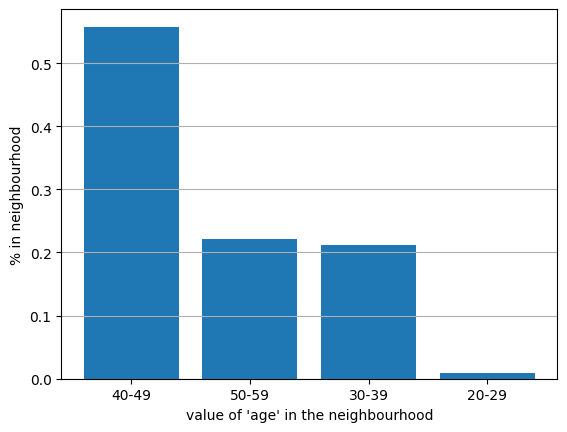

In [11]:
plt.bar(list(iter_log[1]['frequencies'].keys()), list(iter_log[1]['frequencies'].values()), align='center')
plt.xticks(list(iter_log[1]['frequencies'].keys()))
plt.ylabel('% in neighbourhood')
plt.xlabel('value of \'age\' in the neighbourhood')
plt.grid(axis='y')

Based on these frequencies, the probabilities of the marking outcome are:
- if mark bit == 1 (50%), the new value is the most frequent [40-49]
- if mark bit == 0 (50%), the new value is either [50-59], [30-39] or [20-29], weighted by their frequencies

Hence, overall:
- 40-49 --> 50.00%
- 50-59 --> 25.00% (50%*freq([50-59])/sum(freq([50-59],[30-39],[20-29])))
- 30-39 --> 23.91%
- 20-29 -->  1.09%

#### Marking:
- Mark bit: 1 --> the new value is the most frequent value from the neighbourhood
- New (fingerprinted) value: '_age_': 40-49

In [12]:
fingerprinted_data.iloc[[1]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events


### Step 3: <a class="anchor" id="i-step-3"></a>
#### Marking position: 
- Marking row 2, attribute "_node-caps_"

In [13]:
dataset.iloc[[2]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
2,2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events


#### Neighbourhood: 
- Correlated attributes: _age, menopause, inv-nodes, (node-caps)_
- Neighbourhood size: 62
- Max distance (hamming): 0

In [14]:
dataset.iloc[iter_log[2]['neighbors']]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
60,60,40-49,premeno,20-24,0-2,no,2,left,central,no,no-recurrence-events
4,4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
61,61,40-49,premeno,10-14,0-2,no,1,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...,...
250,250,40-49,premeno,25-29,0-2,no,3,left,left_up,no,recurrence-events
251,251,40-49,premeno,50-54,0-2,no,2,right,left_low,yes,recurrence-events
256,256,40-49,premeno,30-34,0-2,no,1,left,left_low,yes,recurrence-events
272,272,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events


- Frequencies in the neighbourhood:

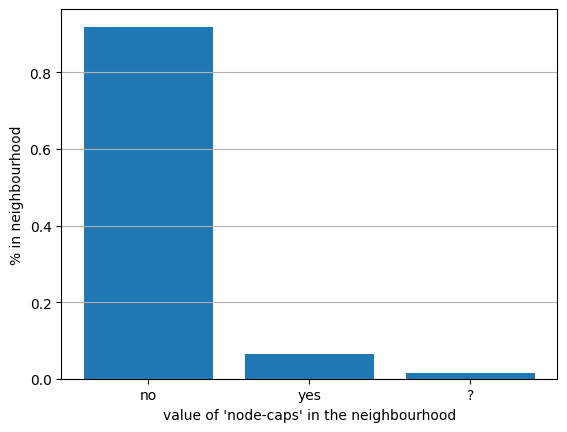

In [15]:
plt.bar(list(iter_log[2]['frequencies'].keys()), list(iter_log[2]['frequencies'].values()), align='center')
plt.xticks(list(iter_log[2]['frequencies'].keys()))
plt.ylabel('% in neighbourhood')
plt.xlabel('value of \'node-caps\' in the neighbourhood')
plt.grid(axis='y')

Note: we consider missing values as another category likely to accur in the dataset. However, this can be handled differently via preprocessing.

#### Marking:
- Mark bit: 0 --> the new value is the most frequent value from the neighbourhood
- New (fingerprinted) value: '_node-caps_': yes

In [16]:
fingerprinted_data.iloc[[2]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
2,2,40-49,premeno,20-24,0-2,yes,2,left,left_low,no,no-recurrence-events


The marking is repeated in the same fashion for all remaining steps.

## 2. Detection Algorithm <a class="anchor" id="detection"></a>
Detection algorithm takes as input the fingerpirnted dataset and following parameters:
- owner's secret key
- gamma (original ratio of marked rows), length of the fingerprint
- a list of marked attribute names
- a list of correlated attributes
- whether the algorithm is distance based (_d_ -- max distance for the neighbourhood) or cardinality based (_k_ -- min cardinality of the neighbourhood)

In [17]:
fingerprinted_data

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,1,left,left_low,no,no-recurrence-events
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,2,40-49,premeno,20-24,0-2,yes,2,left,left_low,no,no-recurrence-events
3,3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,4,40-49,ge40,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...,...
281,281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
282,282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
283,283,50-59,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
284,284,40-49,ge40,30-34,3-5,no,3,left,left_low,no,recurrence-events


In [18]:
# 1st position where the mark -should- be
suspect, det_iter_log = scheme.demo_detection(fingerprinted_data, secret_key=601, primary_key='Id',
                               correlated_attributes=['age', 'menopause', 'inv-nodes', 'node-caps'],
                               original_columns=["age", "menopause", "tumor-size", "inv-nodes", "node-caps",
                                                 "deg-malig", "breast", "breast-quad",
                                                 "irradiat", "recurrence"])

Start demo NCorr fingerprint detection algorithm ...
	gamma: 1
	correlated attributes: ['age', 'menopause', 'inv-nodes', 'node-caps']
[[0, 2], [0, 2], [0, 3], [5, 0], [4, 0], [4, 0], [3, 0], [1, 3], [1, 1], [3, 1], [0, 5], [0, 3], [0, 2], [0, 3], [4, 0], [0, 0]]
[[0, 5], [0, 6], [0, 4], [5, 1], [6, 1], [5, 0], [6, 0], [1, 7], [3, 1], [5, 2], [0, 7], [0, 7], [1, 7], [1, 7], [10, 0], [2, 0]]
[[1, 10], [0, 10], [3, 11], [11, 2], [14, 1], [10, 1], [9, 1], [2, 13], [9, 2], [9, 3], [1, 12], [2, 17], [2, 10], [1, 14], [15, 1], [3, 0]]
Fingerprint detected: 1110000100111100
Fingerprint belongs to Recipient 4
Runtime: 0 ms.


The detected fingerprint is correct and attributed to the correct recipient, hence, the detection was successful. 


The detection reverses the insertion process. This means that each step from detection should match the respective step from the insertion in terms of choosing the same marking row, attribute, and a fingerprint bit. 
Let's inspect the steps:

### Step 1 <a class="anchor" id="d-step-1"></a>
#### Marking position: 
- Marking row: 0
- Marking attribute: "_deg-malig_"
- Value at the position: 1

In [19]:
# det_iter_log[0]['row_index'] # --> 0
# det_iter_log[0]['attribute'] # --> deg-malig
fingerprinted_data.iloc[[0]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,1,left,left_low,no,no-recurrence-events


#### Neighbourhood: 
- Correlated attributes: _age, menopause, inv-nodes, node-caps_
- Neighbourhood size: 19
- Max distance (hamming): 0

In [20]:
# max(det_iter_log[0]['dist'])
fingerprinted_data.iloc[det_iter_log[0]['neighbors']] 

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,1,left,left_low,no,no-recurrence-events
148,148,30-39,premeno,20-24,0-2,no,3,left,central,no,no-recurrence-events
171,171,30-39,premeno,15-19,0-2,no,1,left,left_low,no,no-recurrence-events
159,159,30-39,premeno,35-39,0-2,no,1,left,left_low,no,no-recurrence-events
35,35,30-39,premeno,30-34,0-2,no,2,left,left_up,no,no-recurrence-events
118,118,30-39,premeno,30-34,0-2,no,1,right,left_low,no,no-recurrence-events
116,116,30-39,premeno,0-4,0-2,no,1,left,left_low,no,no-recurrence-events
107,107,30-39,premeno,40-44,0-2,no,2,right,right_up,no,no-recurrence-events
48,48,30-39,premeno,20-24,0-2,no,1,right,right_up,no,no-recurrence-events
51,51,30-39,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events


- Frequencies in the neighbourhood.

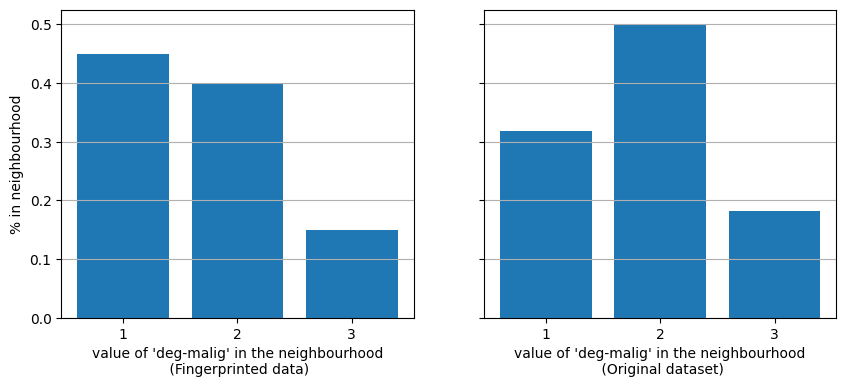

In [21]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,4))

axs[0].bar(list(det_iter_log[0]['frequencies'].keys()), list(det_iter_log[0]['frequencies'].values()), align='center')
axs[0].set_xticks(list(det_iter_log[0]['frequencies'].keys()))
axs[0].set_ylabel('% in neighbourhood')
axs[0].set_xlabel('value of \'deg-malig\' in the neighbourhood\n (Fingerprinted data)')
axs[0].grid(axis='y')

axs[1].bar(list(iter_log[0]['frequencies'].keys()), list(iter_log[0]['frequencies'].values()), align='center')
axs[1].set_xticks(list(iter_log[0]['frequencies'].keys()))
axs[1].set_xlabel('value of \'deg-malig\' in the neighbourhood\n (Original dataset)')
axs[1].grid(axis='y')

On the left-hand side, we show the neighbourhoods in the fingerprinted data obtained during the detection. On the right-hand side we show the neighbourhoods of the same record from the original data for comparison.

Note that the neihghbourhood for the same record is not the same -- this is because the fingerprint marks disrupt calculating distances from the record in question. If the similar distribution is preserved, the fingerprint marks will be extracted correctly. The detection algorithm makes a decision on the fingerprint mark based on the frequency ranking and not the exact frequency value. However, this might mean that _some_ marks might be detected wrongly:

#### Detecting the mark:
- Mark bit: 1 --> the fingerprinted value is the most represented in the neighbourhood, hence the mark bit must have been 1 according to the insertion algorithm. In this case, this is a detection error. 
- Detected pseudorandomly in this step:
    - Mask bit: 0 (retrieved pseudorandomly in this step)
    - Finterprint bit position (index): 8
- Fingerprint bit value: 1 (mark bit xor mask bit)

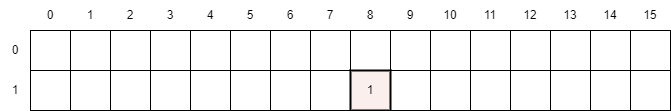

In [22]:
# det_iter_log[0]['mark_bit'] # --> 1
# det_iter_log[0]['mask_bit'] # --> 0
# det_iter_log[0]['fingerprint_idx'] # --> 8
# det_iter_log[0]['fingerprint_bit'] # --> 1

# updating the votes for fingerprint 
Image("NCorrFP_scheme/figures/CorNN-demo-Votes-step1.png")

The detection error is only a vote in a fingerprint template, hence, the algorithm still has a chance to recover if the majority of the votes for position 8 will be correct in upcoming steps (0).

### Step 2 <a class="anchor" id="d-step-2"></a>
#### Marking position: 
- Marking row: 1
- Marking attribute: "_age_"
- Value at the position: 40-49

In [23]:
det_iter_log[1]['attribute']

'age'

In [24]:
fingerprinted_data.iloc[[1]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events


#### Neighbourhood: 
- Correlated attributes: _(age), menopause, inv-nodes, node-caps_
- Neighbourhood size: 85
- Max distance (hamming): 0

In [25]:
fingerprinted_data.iloc[det_iter_log[1]['neighbors']]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,1,left,left_low,no,no-recurrence-events
67,67,50-59,premeno,20-24,0-2,no,3,left,left_up,no,no-recurrence-events
66,66,40-49,premeno,25-29,0-2,no,1,right,left_low,no,no-recurrence-events
139,139,40-49,premeno,30-34,0-2,no,2,left,right_low,no,no-recurrence-events
78,78,50-59,premeno,25-29,0-2,no,2,left,left_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...,...
252,252,30-39,premeno,40-44,0-2,no,1,left,left_up,no,no-recurrence-events
256,256,40-49,premeno,30-34,0-2,no,1,left,left_low,yes,recurrence-events
268,268,30-39,premeno,15-19,0-2,no,3,left,left_low,no,recurrence-events
281,281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events


- Frequencies in the neighbourhood:

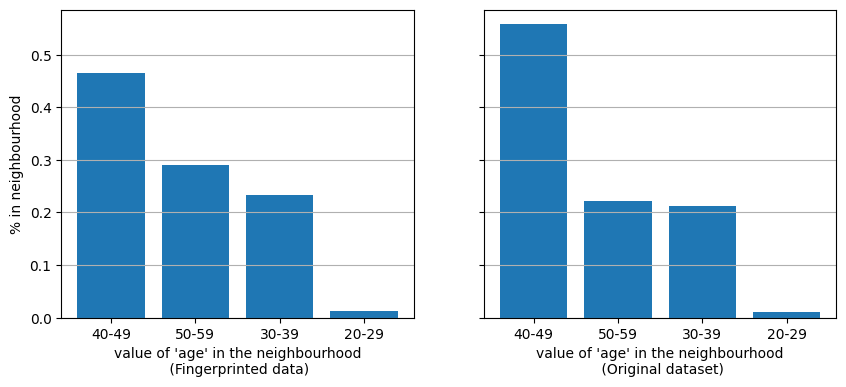

In [26]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,4))

axs[0].bar(list(det_iter_log[1]['frequencies'].keys()), list(det_iter_log[1]['frequencies'].values()), align='center')
axs[0].set_xticks(list(det_iter_log[1]['frequencies'].keys()))
axs[0].set_ylabel('% in neighbourhood')
axs[0].set_xlabel('value of \'age\' in the neighbourhood\n (Fingerprinted data)')
axs[0].grid(axis='y')

axs[1].bar(list(iter_log[1]['frequencies'].keys()), list(iter_log[1]['frequencies'].values()), align='center')
axs[1].set_xticks(list(iter_log[1]['frequencies'].keys()))
axs[1].set_xlabel('value of \'age\' in the neighbourhood\n (Original dataset)')
axs[1].grid(axis='y')

The frequencies this time resemble more closely those in the original data, hence no confusion about the marking bit is made by the detection algorithm: 

#### Detecting the mark:
- Mark bit: 1 --> the fingerprinted value is the most represented in the neighbourhood, hence the mark bit must have been 1
- Detected pseudorandomly in this step:
    - Mask bit: 1 
    - Finterprint bit position (index): 3
- Fingerprint bit value: 0 (mark bit xor mask bit)

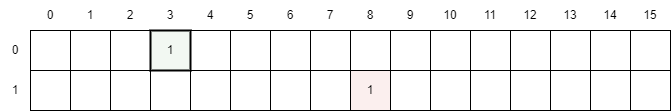

In [27]:
# det_iter_log[1]['mark_bit'] # --> 1
# det_iter_log[1]['mask_bit'] # --> 1
# det_iter_log[1]['fingerprint_idx'] # --> 3
# det_iter_log[1]['fingerprint_bit'] # --> 0

# updating the votes for fingerprint 
Image("NCorrFP_scheme/figures/CorNN-demo-Votes-step2.png")

### Step 3 <a class="anchor" id="d-step-3"></a>
#### Marking position: 
- Marking row: 3
- Marking attribute: "_node-caps_"
- Value at the position: yes

In [28]:
fingerprinted_data.iloc[[2]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
2,2,40-49,premeno,20-24,0-2,yes,2,left,left_low,no,no-recurrence-events


#### Neighbourhood: 
- Correlated attributes: _age, menopause, inv-nodes, (node-caps)_
- Neighbourhood size: 49
- Max distance (hamming): 0

In [29]:
fingerprinted_data.iloc[det_iter_log[2]['neighbors']]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,2,40-49,premeno,20-24,0-2,yes,2,left,left_low,no,no-recurrence-events
64,64,40-49,premeno,25-29,0-2,yes,1,left,right_low,no,no-recurrence-events
9,9,40-49,premeno,20-24,0-2,no,2,right,left_up,no,no-recurrence-events
10,10,40-49,premeno,0-4,0-2,yes,3,left,central,no,no-recurrence-events
65,65,40-49,premeno,10-14,0-2,yes,1,right,left_up,no,no-recurrence-events
14,14,40-49,premeno,30-34,0-2,no,3,left,left_up,no,recurrence-events
66,66,40-49,premeno,25-29,0-2,no,1,right,left_low,no,no-recurrence-events
145,145,40-49,premeno,25-29,0-2,yes,2,left,right_low,yes,no-recurrence-events
79,79,40-49,premeno,25-29,0-2,no,2,right,central,no,recurrence-events


- Frequencies in the neighbourhood:

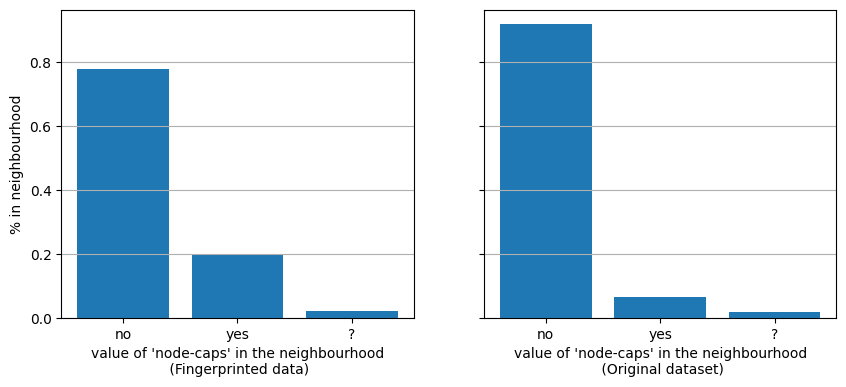

In [30]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,4))

axs[0].bar(list(det_iter_log[2]['frequencies'].keys()), list(det_iter_log[2]['frequencies'].values()), align='center')
axs[0].set_xticks(list(det_iter_log[2]['frequencies'].keys()))
axs[0].set_ylabel('% in neighbourhood')
axs[0].set_xlabel('value of \'node-caps\' in the neighbourhood\n (Fingerprinted data)')
axs[0].grid(axis='y')

axs[1].bar(list(iter_log[2]['frequencies'].keys()), list(iter_log[2]['frequencies'].values()), align='center')
axs[1].set_xticks(list(iter_log[2]['frequencies'].keys()))
axs[1].set_xlabel('value of \'node-caps\' in the neighbourhood\n (Original dataset)')
axs[1].grid(axis='y')

The frequencies resemble the original and it again does not affect the fingerprint bit detection.

#### Detecting the mark:
- Mark bit: 0 --> the fingerprinted value is not the most represented in the neighbourhood, hence the mark bit must have been 0
- Detected pseudorandomly in this step:
    - Mask bit: 0
    - Finterprint bit position (index): 14
- Fingerprint bit value: 0 (mark bit xor mask bit)

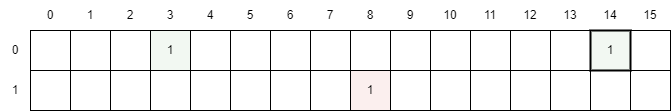

In [31]:
# det_iter_log[2]['mask_bit'] # --> 0
# det_iter_log[2]['fingerprint_idx'] # --> 14
# det_iter_log[2]['fingerprint_bit'] # --> 0

# updating the votes for fingerprint 
Image("NCorrFP_scheme/figures/CorNN-demo-Votes-step3.png")

## ...
We jump to steps 50, 100, 200 and the last step to see the status of the fingerprint template and the votes:
## Step 50 <a class="anchor" id="d-step-50"></a>

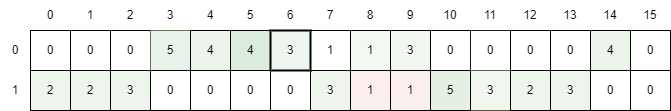

In [32]:
# det_iter_log[49]['fingerprint_bit' # --> 0
# [[0, 2], [0, 2], [0, 3], [5, 0], [4, 0], [4, 0], [3, 0], [1, 3], 
# [1, 1], [3, 1], [0, 5], [0, 3], [0, 2], [0, 3], [4, 0], [0, 0]]

# updating the votes for fingerprint 
Image("NCorrFP_scheme/figures/CorNN-demo-Votes-step50.png")

## Step 100

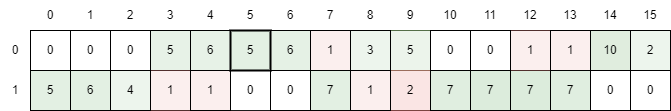

In [33]:
# det_iter_log[99]['fingerprint_idx'] # --> 5
# [[0, 5], [0, 6], [0, 4], [5, 1], [6, 1], [5, 0], [6, 0], [1, 7], 
# [3, 1], [5, 2], [0, 7], [0, 7], [1, 7], [1, 7], [10, 0], [2, 0]]

# updating the votes for fingerprint 
Image("NCorrFP_scheme/figures/CorNN-demo-Votes-step100.png")

## Step 200

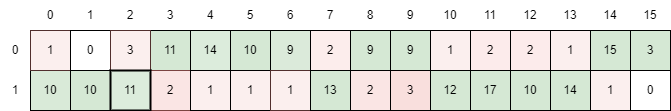

In [34]:
# det_iter_log[199]['fingerprint_idx'] # --> 2
# [[1, 10], [0, 10], [3, 11], [11, 2], [14, 1], [10, 1], [9, 1], [2, 13], 
#  [9, 2], [9, 3], [1, 12], [2, 17], [2, 10], [1, 14], [15, 1], [3, 0]]


# updating the votes for fingerprint 
Image("NCorrFP_scheme/figures/CorNN-demo-Votes-step200.png")

## The final result of the detection algorithm
With minor errors in voting, the fingerprint bit-string has been recovered succcessfully. Below we see the final bit-wise votes. The corresponding fingerprint is hence [1110000100111100]

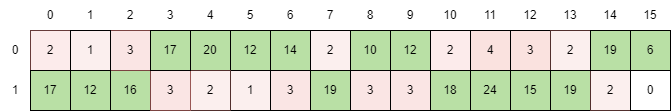

In [35]:
#[[2, 17], [1, 12], [3, 16], [17, 3], [20, 2], [12, 1], [14, 3], [2, 19], 
# [10, 3], [12, 3], [2, 18], [4, 24], [3, 15], [2, 19], [19, 2], [6, 0]]
Image("NCorrFP_scheme/figures/CorNN-demo-Votes-last.png")